In [29]:
import pandas as pd

import datajoin as dj

In [1]:
# fink_mm_data_path = "/user/julien.peloton/fink_mm/"
# fink_mm_online_path = fink_mm_data_path + "gcn_x_ztf/online/year=2023"

fink_mm_data_path = "ztf_x_gcn_data"
fink_mm_online_path = "ztf_x_gcn_data"

online_pdf = spark.read\
    .option("basePath", fink_mm_data_path)\
    .option('mergeSchema', True)\
    .format("parquet")\
    .load(fink_mm_online_path)

columns = online_pdf.columns
cols_to_keep = [col for col in columns if col != "raw_event"]
online_pdf = online_pdf.select(cols_to_keep).toPandas()

# Check silver afterglow

In [5]:
silver_pdf = online_pdf[online_pdf["is_grb_silver"] & ~online_pdf["is_grb_gold"]]

In [15]:
silver_pdf[["triggerId", "observatory", "instrument", "event", "triggerTimeUTC", "gcn_ra", "gcn_dec"]].drop_duplicates("triggerId")#.sort_values("triggerTimeUTC")

,triggerId,observatory,instrument,event,triggerTimeUTC,gcn_ra,gcn_dec
6545,710117592,Fermi,GBM,,2023-07-04 00:53:07.380,315.2500,47.5300
28690,711982704,Fermi,GBM,,2023-07-25 14:58:19.320,30.1700,47.7600
62345,1180410,SWIFT,BAT,,2023-07-23 13:42:32.880,250.3788,-5.3272
93870,712148591,Fermi,GBM,,2023-07-27 13:03:06.850,323.8300,73.6500
117044,10333,INTEGRAL,Weak,,2023-07-23 08:44:14.910,347.2191,57.6853
134233,711805358,Fermi,GBM,,2023-07-23 13:42:33.030,249.3400,-8.3400
158991,10332,INTEGRAL,Weak,,2023-07-22 07:34:07.340,25.3117,60.8223
174499,10330,INTEGRAL,Weak,,2023-07-21 17:17:29.340,356.8187,49.9429
186984,1180055,SWIFT,BAT,,2023-07-20 09:18:24.320,245.9602,-12.7263
257192,709410255,Fermi,GBM,,2023-06-25 20:24:10.710,321.2000,-18.6600


In [21]:
afterglow_pdf = pd.read_json("afterglow.json")
afterglow_pdf["triggerId"] = afterglow_pdf["triggerId"].astype(str)

In [23]:
silver_afterglow = silver_pdf.merge(afterglow_pdf, on="triggerId", how="outer")

In [34]:
afterglow_detected = silver_afterglow[silver_afterglow["comment"] == "afterglow detected"].drop_duplicates("triggerId")

In [35]:
afterglow_detected[["triggerId", "gcn_status"]]

,triggerId,gcn_status
55,1192253,initial
62,1192251,update_0
175,714809315,initial
178,1175438,initial
179,1186032,initial
183,713559497,initial


In [36]:
data_join = dj.DataJoin(online_pdf)

1192253
|    |   gcn_ra |   gcn_dec |   afterglow_ra |   afterglow_dec |
|---:|---------:|----------:|---------------:|----------------:|
| 55 |  261.576 |  -17.1172 |        14.2466 |         80.1456 |


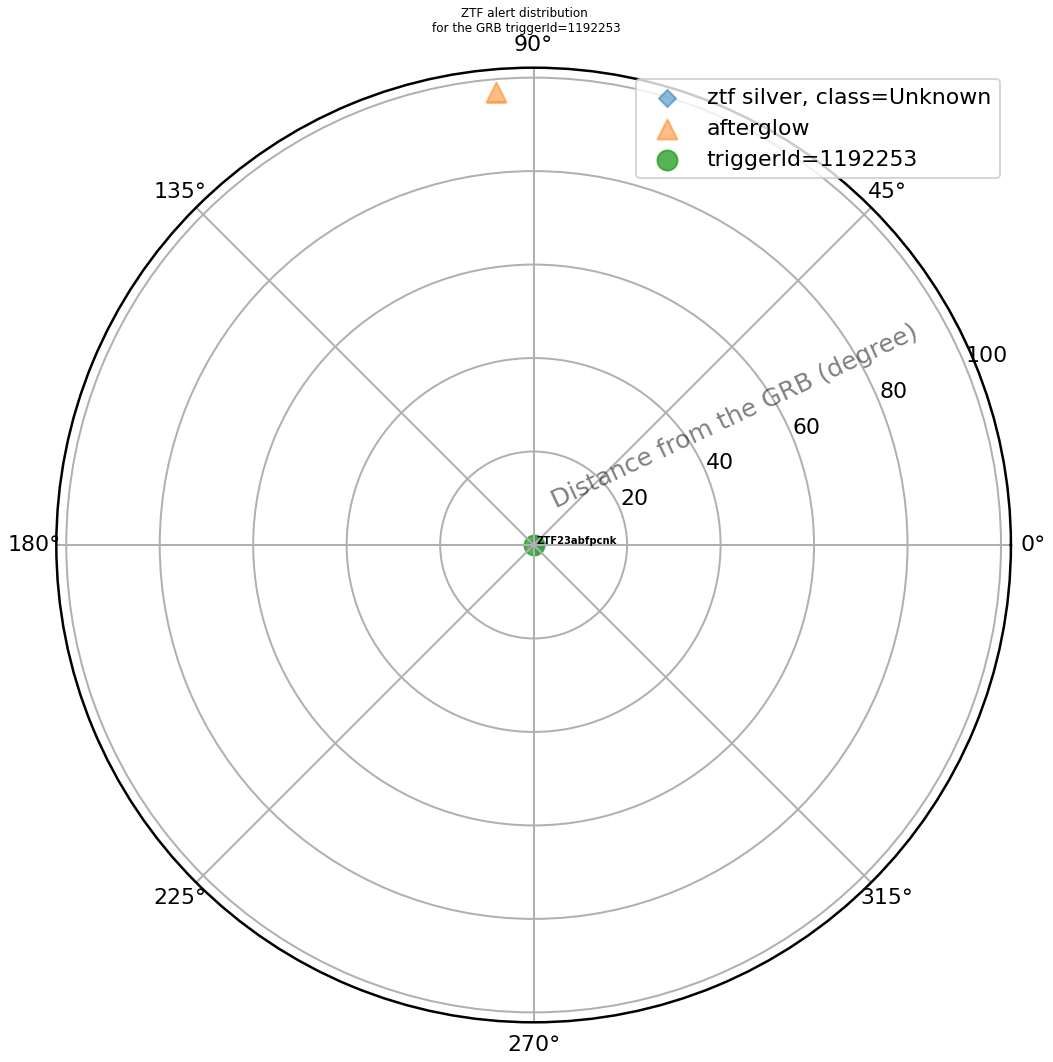

1192251
|    |   gcn_ra |   gcn_dec |   afterglow_ra |   afterglow_dec |
|---:|---------:|----------:|---------------:|----------------:|
| 62 |  261.774 |  -17.0322 |        14.2466 |         80.1456 |


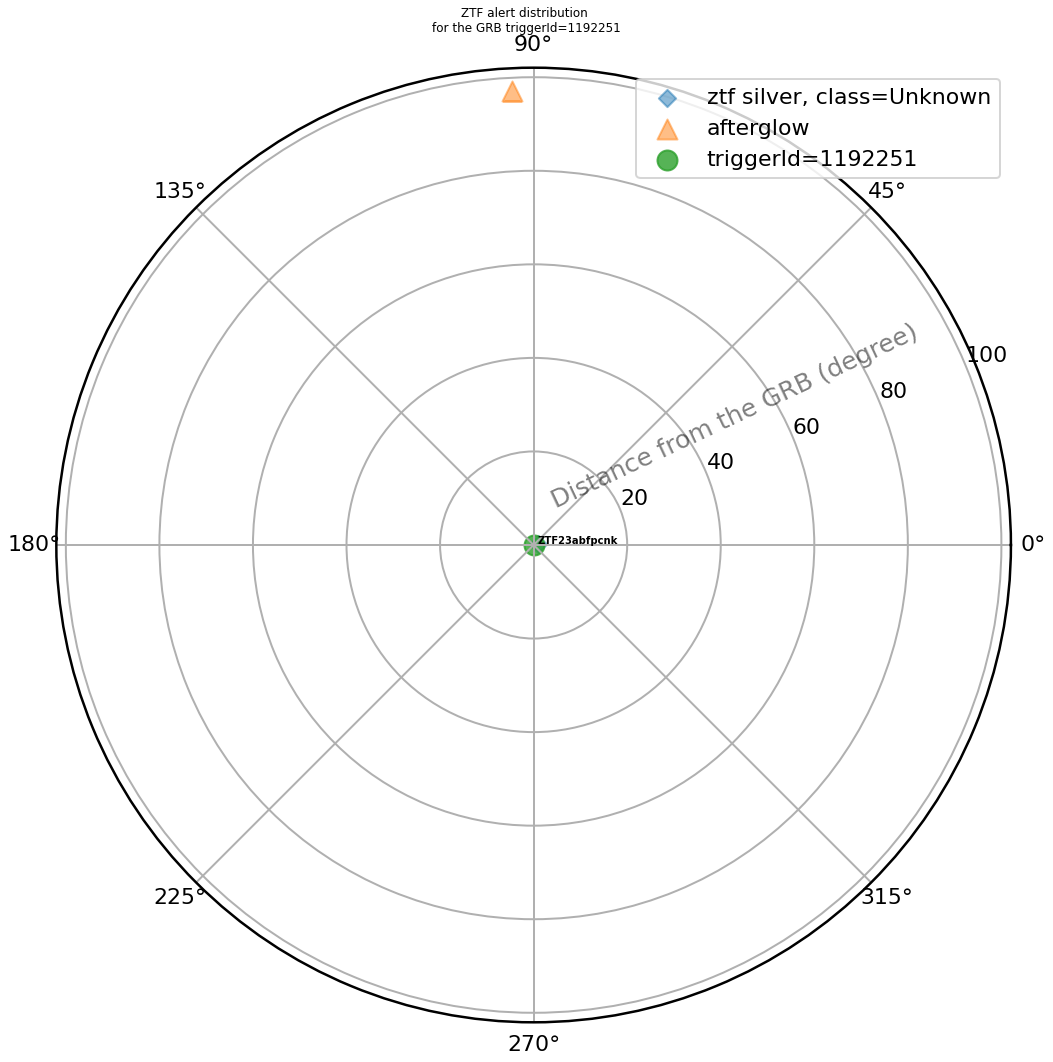

714809315
|     |   gcn_ra |   gcn_dec |   afterglow_ra |   afterglow_dec |
|----:|---------:|----------:|---------------:|----------------:|
| 175 |   299.32 |     56.47 |         299.64 |         54.4633 |


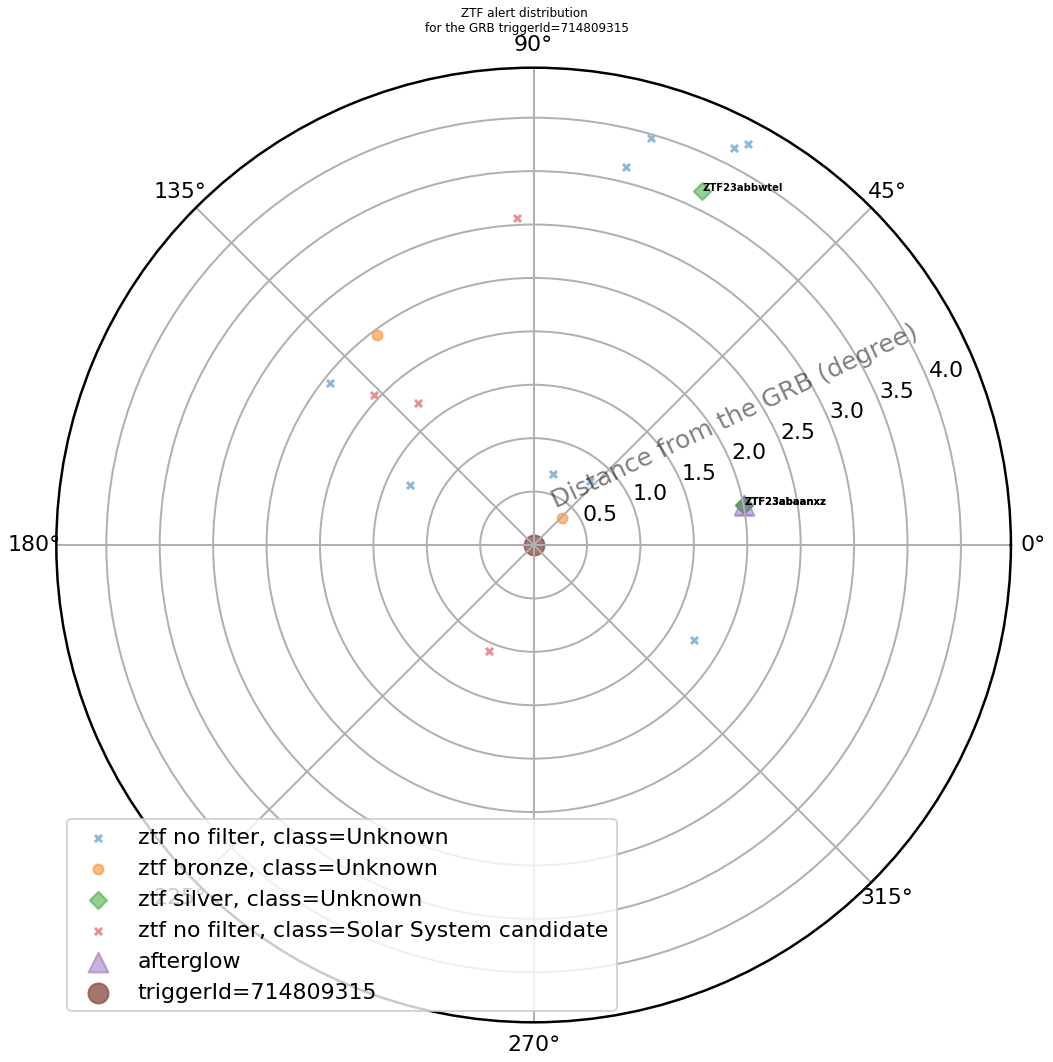

1175438
|     |   gcn_ra |   gcn_dec |   afterglow_ra |   afterglow_dec |
|----:|---------:|----------:|---------------:|----------------:|
| 178 |  196.606 |     3.303 |        196.605 |         3.30238 |


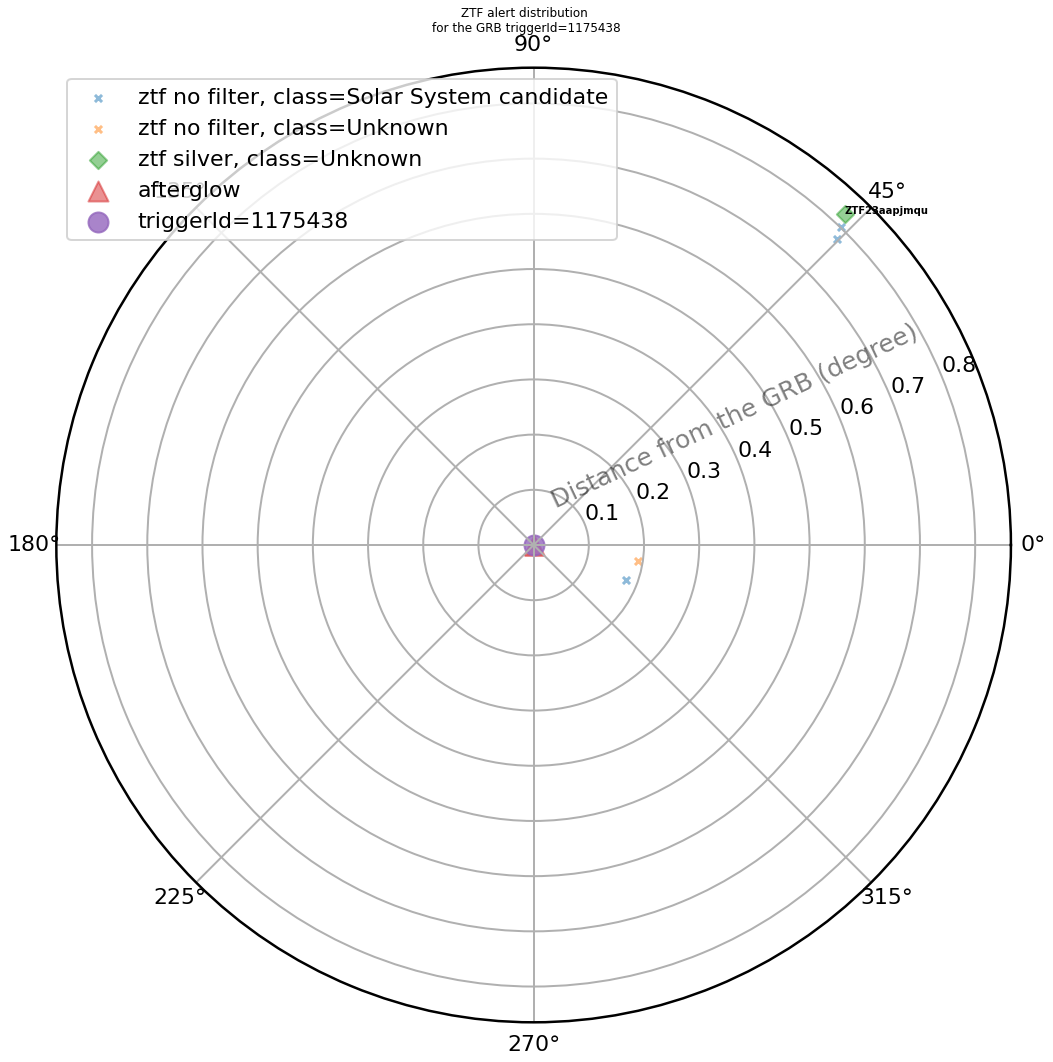

1186032
|     |   gcn_ra |   gcn_dec |   afterglow_ra |   afterglow_dec |
|----:|---------:|----------:|---------------:|----------------:|
| 179 |  285.889 |   40.8953 |        285.888 |         40.8967 |


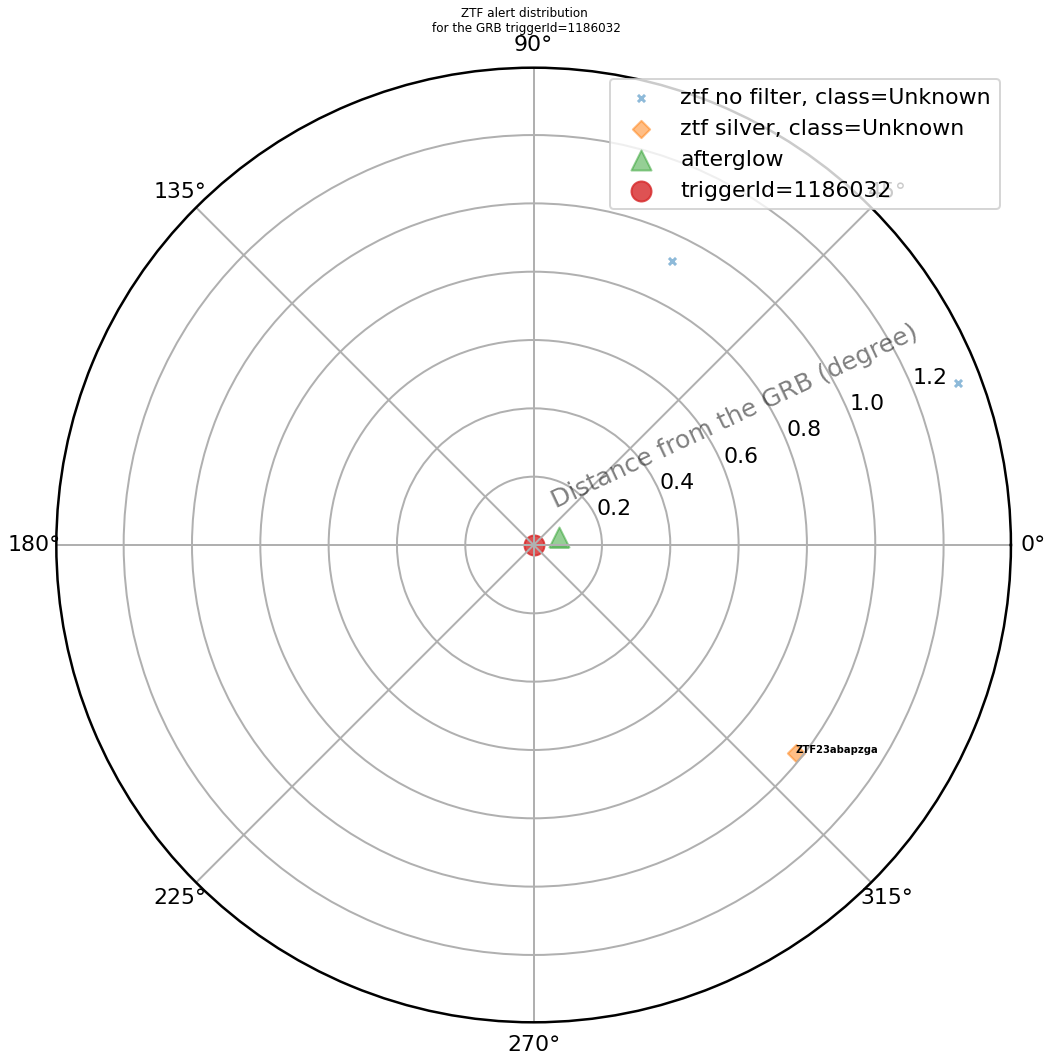

713559497
|     |   gcn_ra |   gcn_dec |   afterglow_ra |   afterglow_dec |
|----:|---------:|----------:|---------------:|----------------:|
| 183 |   250.06 |      46.2 |         249.13 |           47.86 |


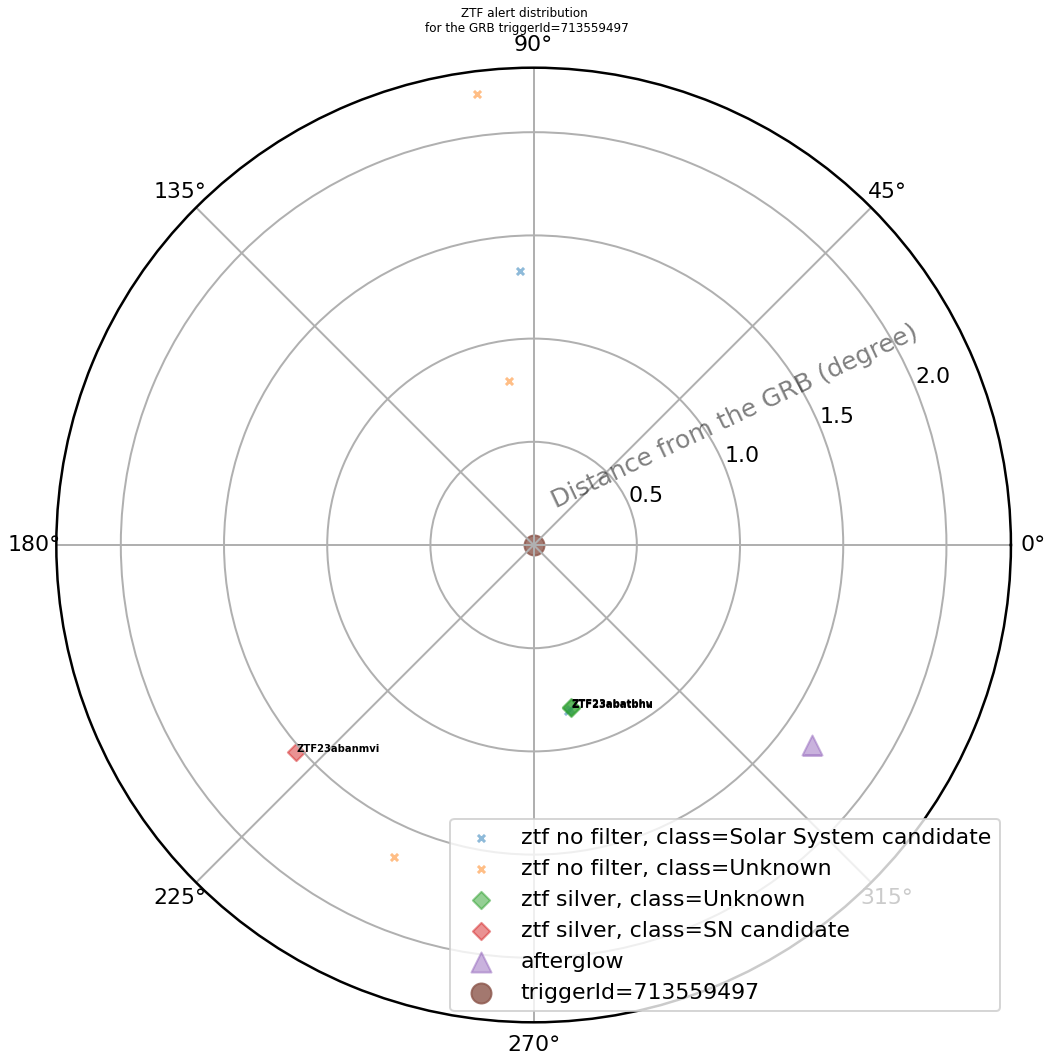

In [51]:
for trId, status in zip(afterglow_detected["triggerId"], afterglow_detected["gcn_status"]):
    print(trId)
    tmp_pdf = afterglow_detected[afterglow_detected["triggerId"] == trId]
    print(tmp_pdf[["gcn_ra", "gcn_dec", "afterglow_ra", "afterglow_dec"]].to_markdown())
    gcn_event = data_join.get_gcn_join(trId, status)
    gcn_event.plot_alert_distribution()

In [64]:
data_join.save_data_analysis("714809315", "initial", "gcn_analysis/silver")

|                | GCN INFO                   |
|:---------------|:---------------------------|
| triggerId      | 714809315                  |
| ackTime        | 2023-08-27 11:04:28.805957 |
| triggerTimeUTC | 2023-08-27 08:08:30.730000 |
| observatory    | Fermi                      |
| instrument     | GBM                        |
| event          |                            |
| gcn_status     | initial                    |
| gcn_loc_error  | 130.2                      |


/spark_mongo_tmp/roman.le-montagner/Doctorat/Fink_MM/notebook/datajoin.py:604: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


nb silver or gold alerts: 2
ZTF23abbwtel : 0 / 2 / 2
ZTF23abaanxz : 1 / 1 / 2


# Check gold afterglow

In [56]:
gold_pdf = online_pdf[online_pdf["is_grb_gold"]]

In [58]:
gold_pdf[[
    "triggerId", 
    "observatory", 
    "instrument", 
    "event", 
    "triggerTimeUTC", 
    "gcn_ra", 
    "gcn_dec"
]].drop_duplicates("triggerId")#.sort_values("triggerTimeUTC")

,triggerId,observatory,instrument,event,triggerTimeUTC,gcn_ra,gcn_dec
27915,1180410,SWIFT,BAT,,2023-07-23 13:42:32.880,250.3788,-5.3272
171970,1180055,SWIFT,BAT,,2023-07-20 09:18:24.320,245.9602,-12.7263
254406,711982704,Fermi,GBM,,2023-07-25 14:58:19.320,30.1700,47.7600
301000,709410255,Fermi,GBM,,2023-06-25 20:24:10.710,321.2000,-18.6600
556911,708758776,Fermi,GBM,,2023-06-18 07:26:11.930,257.5100,-6.6700
585058,10370,INTEGRAL,Weak,,2023-08-18 04:58:02.850,78.6760,9.6600


1180410
| gcn_ra   | gcn_dec   | afterglow_ra   | afterglow_dec   |
|----------|-----------|----------------|-----------------|


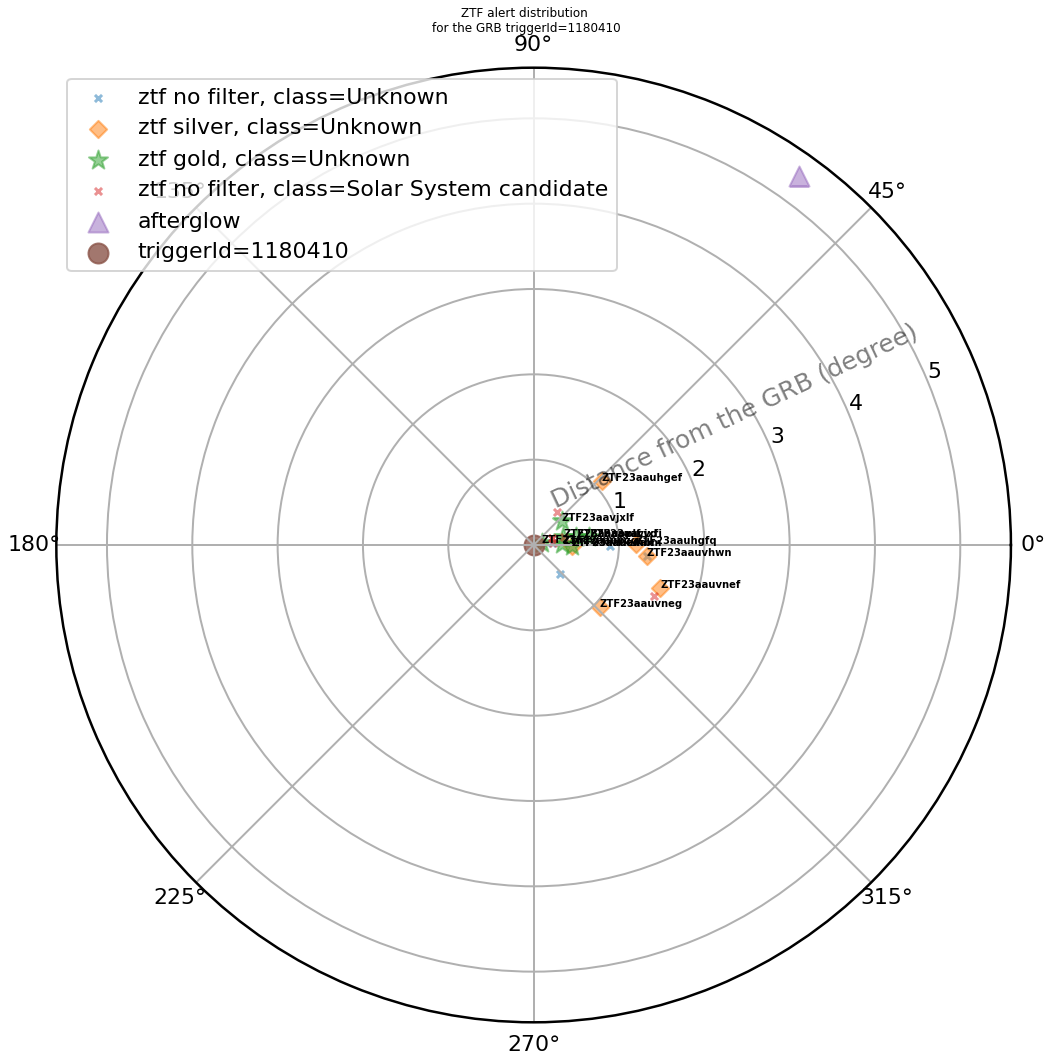

1180055
| gcn_ra   | gcn_dec   | afterglow_ra   | afterglow_dec   |
|----------|-----------|----------------|-----------------|


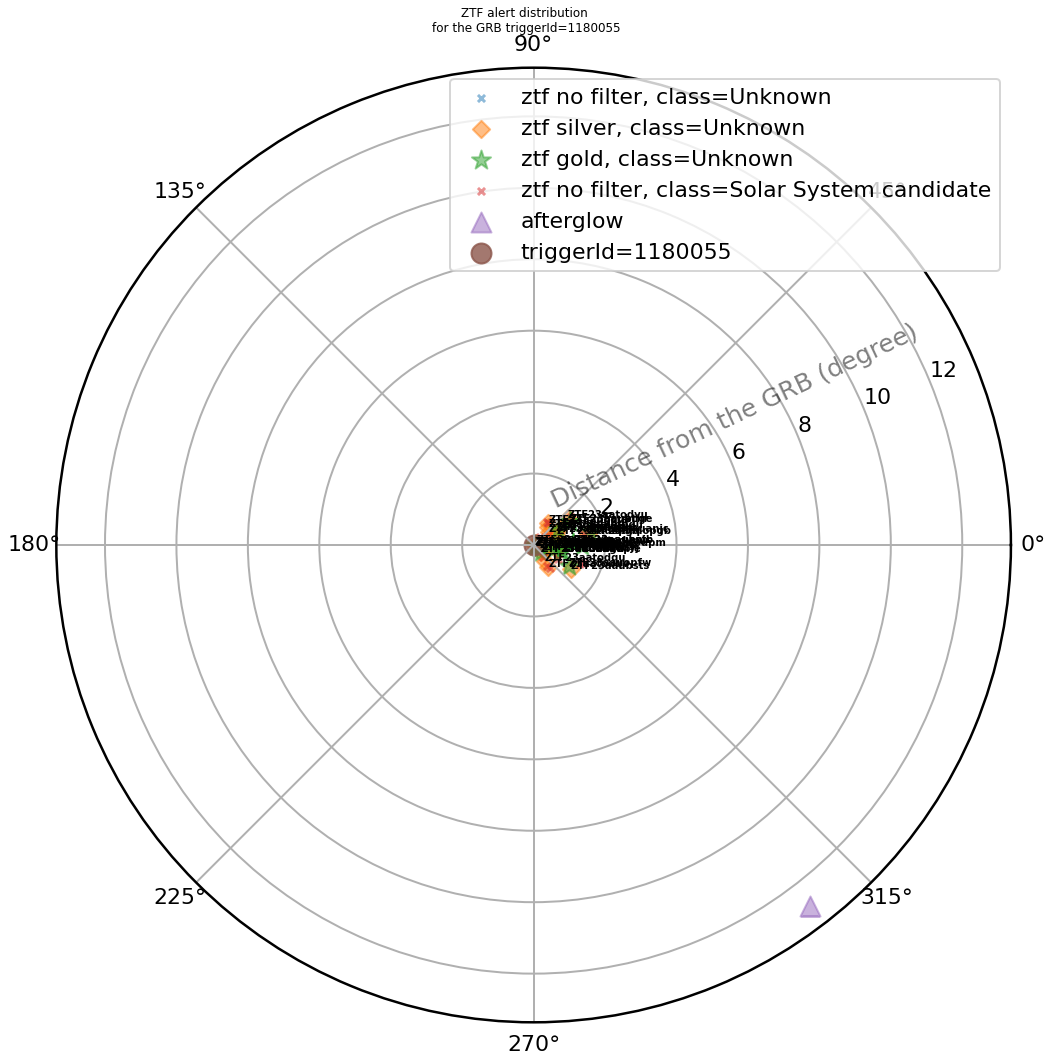

711982704
| gcn_ra   | gcn_dec   | afterglow_ra   | afterglow_dec   |
|----------|-----------|----------------|-----------------|


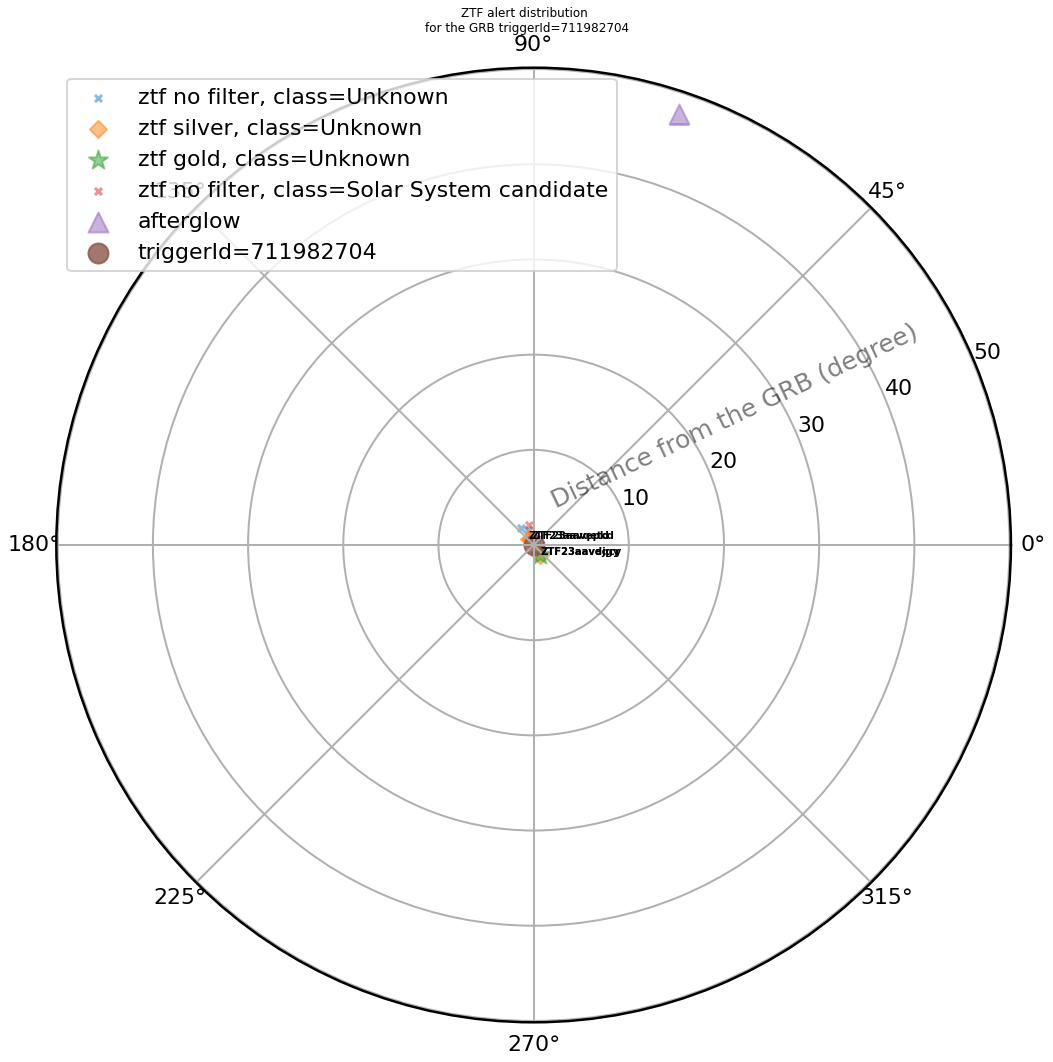

709410255
| gcn_ra   | gcn_dec   | afterglow_ra   | afterglow_dec   |
|----------|-----------|----------------|-----------------|


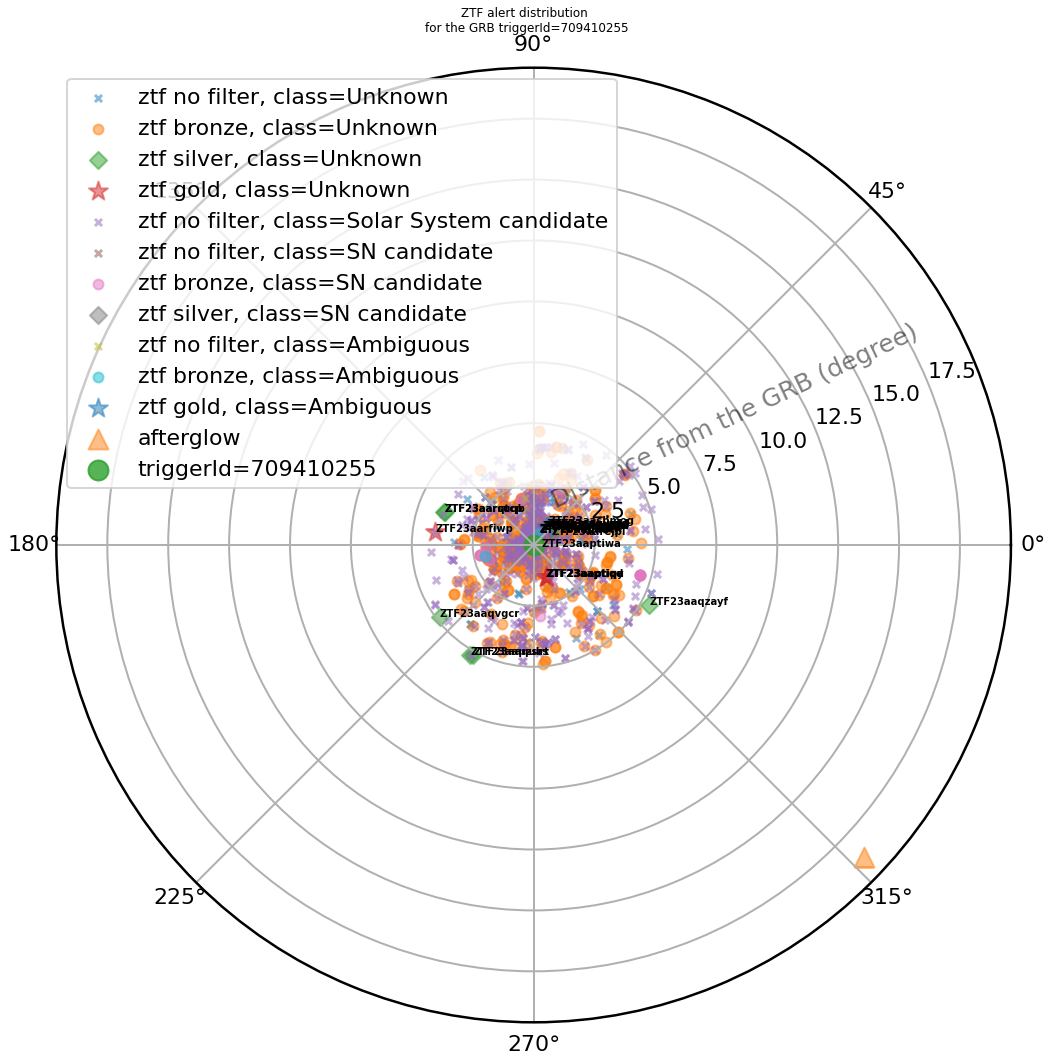

708758776
| gcn_ra   | gcn_dec   | afterglow_ra   | afterglow_dec   |
|----------|-----------|----------------|-----------------|


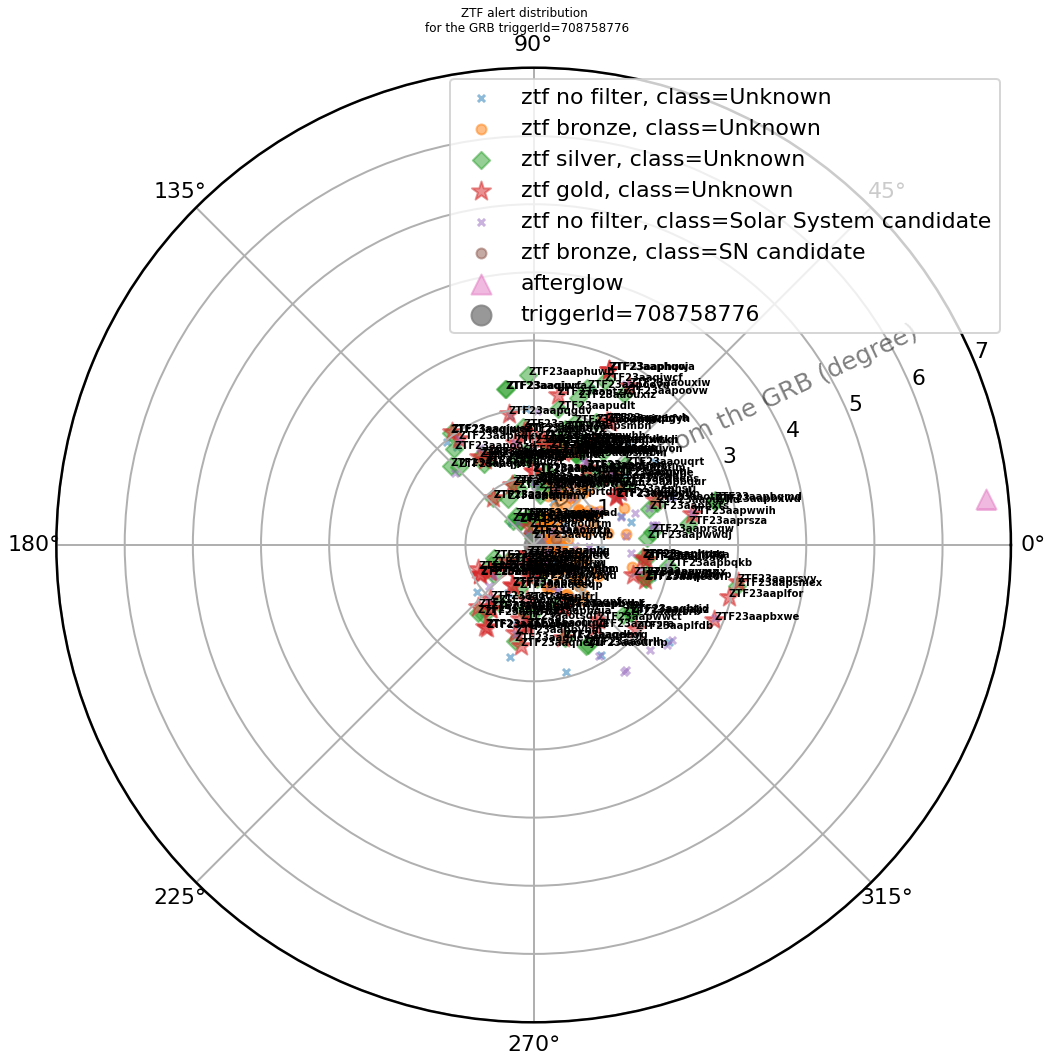

10370
| gcn_ra   | gcn_dec   | afterglow_ra   | afterglow_dec   |
|----------|-----------|----------------|-----------------|


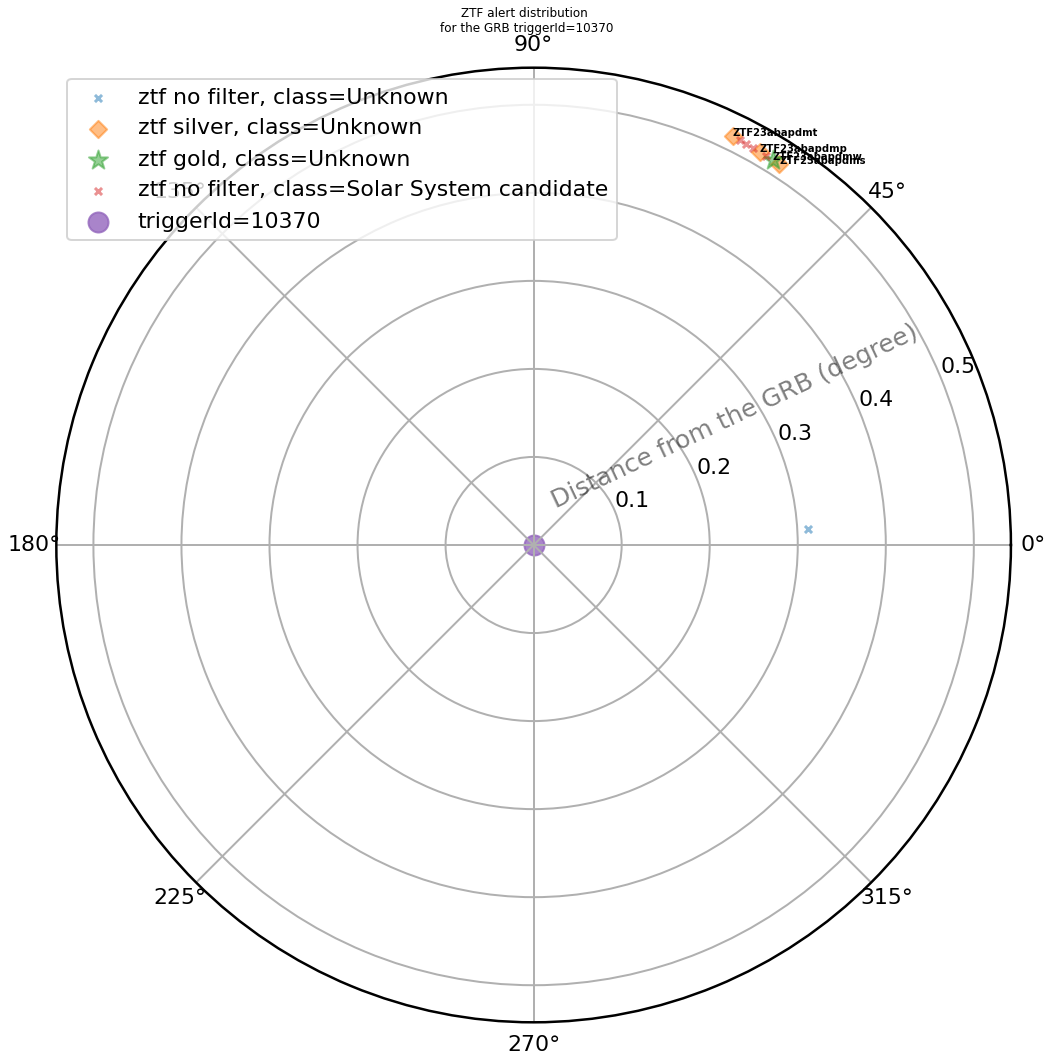

In [63]:
unique_tr_id = gold_pdf.drop_duplicates("triggerId")

for trId, status in zip(unique_tr_id["triggerId"], unique_tr_id["gcn_status"]):
    print(trId)
    tmp_pdf = afterglow_detected[afterglow_detected["triggerId"] == trId]
    print(tmp_pdf[["gcn_ra", "gcn_dec", "afterglow_ra", "afterglow_dec"]].to_markdown())
    gcn_event = data_join.get_gcn_join(trId, status)
    gcn_event.plot_alert_distribution()

In [66]:
t = online_pdf[online_pdf["triggerId"] == "708758776"]

In [68]:
t[t["is_grb_gold"]][["objectId"]]

,objectId
556911,ZTF23aaqjwee
572854,ZTF23aaqneyu
579631,ZTF23aaqbfyj
579632,ZTF23aaqbfyi
579633,ZTF23aaqaovs
...,...
619776,ZTF23aapbyac
619877,ZTF23aaplfor
619881,ZTF23aaplfdb
620535,ZTF23aapenib
